In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fr = open('D:\学习\集思项目\Homework 2\LES.txt')
fr = fr.readlines()
len(fr)

52

In [3]:
def txt2matrix(Filename):
    fr = open(Filename)
    fr = fr.readlines()
    num_rows = len(fr)
    num_columns = len(fr[0].split())
    out_matrix = np.zeros((num_rows-1, num_columns))
    for i in range(1,num_rows):
        out_matrix[i-1,:] = fr[i].split()
    return out_matrix

data = txt2matrix('D:\学习\集思项目\Homework 2\LES.txt')

In [4]:
X = data[:,0:1]
Y = data[:,1:2]
Y1 = data[:,2:3]
Y2 = data[:,3:]

# Answer for Question 1:

theta_hat is 
 [[2.80674245]
 [3.00405741]]


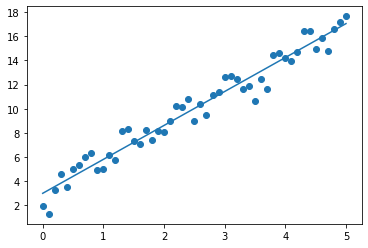

In [5]:
# For y = a_1 * x + a_0
# Using LES Estimation
H = np.column_stack((X, np.ones(51)))
theta_hat = np.linalg.inv(H.T.dot(H)).dot(H.T).dot(Y)
prediction_Y = H.dot(theta_hat)
plt.scatter(X, Y, label = 'Raw Data')
plt.plot(X, prediction_Y)
print("theta_hat is \n",theta_hat)

theta1_hat is 
 [[1.05579723]
 [2.63511396]
 [2.90445558]]


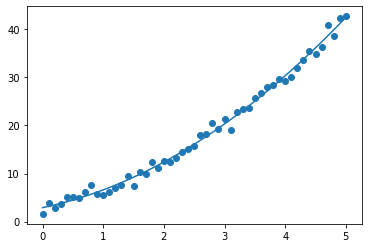

In [6]:
# For y1 = a_2 * x^2 + a_1 * x + a_0
# Using LES Estimation
H1 = np.column_stack((X ** 2, X, np.ones(51)))
theta1_hat = np.linalg.inv(H1.T.dot(H1)).dot(H1.T).dot(Y1)
prediction_Y1 = H1.dot(theta1_hat)
plt.scatter(X, Y1, label = 'Raw Data')
plt.plot(X, prediction_Y1)
print("theta1_hat is \n",theta1_hat)

# Anwser for Question 2:

In [7]:
C = np.row_stack((H[0], H[len(H)-1]))
d = np.row_stack((Y[0], Y[len(Y)-1]))
C1 = np.row_stack((H1[0], H1[len(H1)-1]))
d1 = np.row_stack((Y1[0], Y1[len(Y1)-1]))
print(C)
print(C1)

[[0. 1.]
 [5. 1.]]
[[ 0.  0.  1.]
 [25.  5.  1.]]


theta_hat_constrained is 
 [[3.14313774]
 [1.9173583 ]]


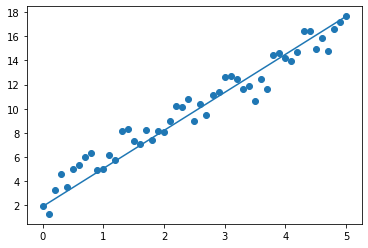

In [8]:
# For y = a_1 * x + a_0
# Using Constrained LES Estimation
lamda = np.linalg.inv(C.dot(np.linalg.inv(H.T.dot(H))).dot(C.T)).dot(C.dot(np.linalg.inv(H.T.dot(H))).dot(H.T).dot(Y)-d)
theta_hat_constrained = np.linalg.inv(H.T.dot(H)).dot(H.T.dot(Y)-C.T.dot(lamda))
prediction_Y_constrained = H.dot(theta_hat_constrained)
plt.scatter(X, Y, label = 'Raw Data')
plt.plot(X, prediction_Y_constrained)
print("theta_hat_constrained is \n", theta_hat_constrained)

theta1_hat_constrained is 
 [[0.94835158]
 [3.47499741]
 [1.6103744 ]]


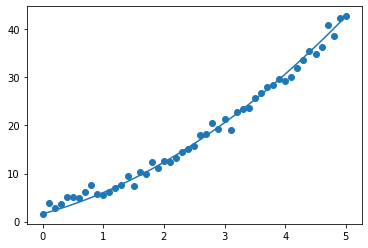

In [9]:
# For y1 = a_2 * x^2 + a_1 * x + a_0
# Using Constrained LES Estimation
lamda1 = np.linalg.inv(C1.dot(np.linalg.inv(H1.T.dot(H1))).dot(C1.T)).dot(C1.dot(np.linalg.inv(H1.T.dot(H1))).dot(H1.T).dot(Y1)-d1)
theta1_hat_constrained = np.linalg.inv(H1.T.dot(H1)).dot(H1.T.dot(Y1)-C1.T.dot(lamda1))
prediction_Y1_constrained = H1.dot(theta1_hat_constrained)
plt.scatter(X, Y1, label = 'Raw Data')
plt.plot(X, prediction_Y1_constrained)
print("theta1_hat_constrained is \n", theta1_hat_constrained)

# Answer for Question 3:

In [10]:
def mean(X):
    count = len(X)
    X_mean = float(np.sum(X) / count)
    return X_mean
    
def variance(X):
    count = len(X)
    variance = np.zeros(count)
    for i in range(count):
        X_mean = mean(X[:i+1])
        variance[i] = (X[i] - X_mean) ** 2
    return variance

In [11]:
def var2weight(var):
    count = len(var)
    W = np.zeros((count,count))
    for i in range(count):
        if var[i] == 0:
            W[i,i] = 1
        else:
            W[i,i] = 1 / var[i]
    return W

In [12]:
# For y = a_1 * x + a_0
# Using Recursive LES Estimation
Y_1 = Y[:41];Y_2 = Y[41:]
H_1 = H[:41];H_2 = H[41:]
W = var2weight(variance(Y))

#W_1 = W[:41,:41];W_2 = W[41:,41:]

#If we use a identity matrix as W
W_1 = np.identity(41);W_2 = np.identity(10)

In [13]:
theta_hat_1 = np.linalg.inv(H_1.T.dot(W_1.dot(H_1))).dot(H_1.T.dot(W_1.dot(Y_1)))

P_1 = np.linalg.inv(H_1.T.dot(W_1.dot(H_1)))
K_2 = P_1.dot(H_2.T).dot(np.linalg.inv(H_2.dot(P_1.dot(H_2.T)) + np.linalg.inv(W_2)))

theta_hat_2 = theta_hat_1 + K_2.dot(Y_2 - H_2.dot(theta_hat_1))

theta_hat_1 is
 [[2.77404272]
 [3.05217597]] 

theta_hat_2 is
 [[2.80674245]
 [3.00405741]]


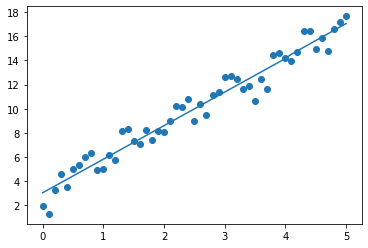

In [14]:
prediction_Y_recursive = np.row_stack((H_1.dot(theta_hat_1), H_2.dot(theta_hat_2)))
plt.scatter(X, Y, label = 'Raw Data')
plt.plot(X, prediction_Y_recursive)
print("theta_hat_1 is\n",theta_hat_1,"\n")
print("theta_hat_2 is\n",theta_hat_2)

In [15]:
# For y1 = a_2 * x^2 + a_1 * x + a_0
# Using Recursive LES Estimation

Y_1 = Y1[:41];Y_2 = Y1[41:]
H_1 = H1[:41];H_2 = H1[41:]

#W_1 = var2weight(variance(Y_1));W_2 = var2weight(variance(Y_2))

#If we use a identity matrix as W
W_1 = np.identity(41);W_2 = np.identity(10)

In [16]:
theta1_hat_1 = np.linalg.inv(H_1.T.dot(W_1.dot(H_1))).dot(H_1.T.dot(W_1.dot(Y_1)))

P_1 = np.linalg.inv(H_1.T.dot(W_1.dot(H_1)))
K_2 = P_1.dot(H_2.T).dot(np.linalg.inv(H_2.dot(P_1.dot(H_2.T)) + np.linalg.inv(W_2)))

theta1_hat_2 = theta1_hat_1 + K_2.dot(Y_2 - H_2.dot(theta1_hat_1))

theta1_hat_1 is
 [[1.07967832]
 [2.59034419]
 [2.90683967]] 

theta1_hat_2 is
 [[1.05579723]
 [2.63511396]
 [2.90445558]]


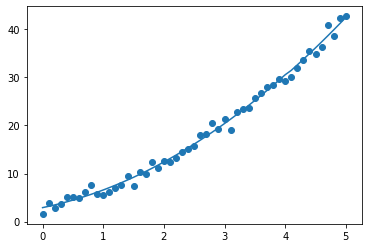

In [17]:
prediction_Y1_recursive = np.row_stack((H_1.dot(theta1_hat_1), H_2.dot(theta1_hat_2)))
plt.scatter(X, Y1, label = 'Raw Data')
plt.plot(X, prediction_Y1_recursive)
print("theta1_hat_1 is\n",theta1_hat_1,"\n")
print("theta1_hat_2 is\n",theta1_hat_2)

# Answer for Question 4:

In [18]:
# For y2 = a_1 * exp(a_2 * x)
# Using Nonlinear LES Estimation

#Initialization
theta2_hat = np.ones((2,1))
H2 = np.zeros((51,2))
W = np.identity(51)
delta_Z = np.ones((51,1))
delta_theta2_hat = np.ones((2,1))

In [19]:
#Calculate theta2_hat

while (delta_theta2_hat[0] > 0.000001 or delta_theta2_hat[1] > 0.000001):
    for i in range(51):
        delta_Z[i] = Y2[i] - theta2_hat[0] * np.exp(theta2_hat[1] * X[i])
        H2[i,0] = np.exp(theta2_hat[1] * X[i])
        H2[i,1] = theta2_hat[0] * X[i] * np.exp(theta2_hat[1] * X[i])
    delta_theta2_hat = np.linalg.inv(H2.T.dot(W.dot(H2))).dot(H2.T.dot(W.dot(delta_Z)))
    theta2_hat = theta2_hat + delta_theta2_hat

theta2_hat is 
 [[5.78913267]
 [0.47553971]]


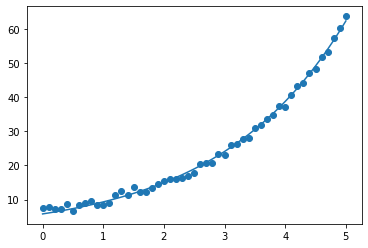

In [20]:
#Prediction

prediction_Y2 = np.zeros(51)

for i in range(51):
    prediction_Y2[i] = theta2_hat[0] * np.exp(theta2_hat[1] * X[i])
plt.scatter(X, Y2, label = 'Raw Data')
plt.plot(X, prediction_Y2)

print("theta2_hat is \n",theta2_hat)